### Introduction to Numpy

- most fundamental third-party package for scientific computing in Python
- multidimensional **array** data structures
- associated functions and methods to manipulate them
- other third-party packages, including pandas, use NumPy arrays as backends for more specialized data structures

#### Comparison to Python

- while Python comes with several container types (`list`, `tuple`, `dict`),
- NumPy's arrays are implemented closer to the hardware, and are therefore more **efficient** than the built-in types.
- this is particularly true for large data, for which NumPy scales much better than Python's built-in data structures.
- NumPy arrays also retain a suite of associated functions and methods that allow for efficient array-oriented computing.

### Import Convention

- By convention numpy is imported

In [1]:
import numpy as np

### NumPy arrays and indexing

- You can index an array in the same way you can index Python using **slice notation**

In [2]:
lst = list(range(1000))
arr = np.arange(1000)

Here's what the array looks like

In [3]:
arr[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
arr[10:20]

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [5]:
arr[10:20:2]

array([10, 12, 14, 16, 18])

In [6]:
type(arr)

numpy.ndarray

In [8]:
%%timeit 

[i ** 2 for i in lst]

36.9 μs ± 274 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [9]:
%%timeit

arr ** 2

914 ns ± 5.12 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


We can index arrays in the same ways as lists

In [10]:
arr[5:10]

array([5, 6, 7, 8, 9])

In [11]:
arr[-1]

999

### Arrays vs Lists

- Arrays are **homogeneously typed**
    - All elements of an array must be of the same type
    - We see why when we think about the memory layout
- Lists can contain elemens of arbitrary type

In [12]:
['a', 2, (1, 3)]

['a', 2, (1, 3)]

In [13]:
lst[0] = 'some other type'

In [14]:
lst[:3]

['some other type', 1, 2]

- We can't do this with an array

In [15]:
arr[0] = 'some other type'

ValueError: invalid literal for int() with base 10: 'some other type'

- The data type is contained in the `dtype` attribute

In [16]:
arr.dtype

dtype('int64')

- The dtype is fixed
- Other types will be cast to this type

In [17]:
arr[0] = 1.234

In [18]:
arr[:10]

array([1, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### What is an array

- Sometimes it's useful to peak under the hood to fix ideas
- A block of memory with some extra unformation on how to interpret its contents

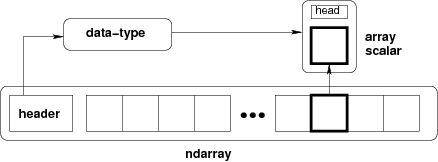

In [22]:
import requests
from IPython.display import Image, display

url = "https://numpy.org/doc/stable/_images/threefundamental.png"
response = requests.get(url)
display(Image(response.content))

### Array Creation

In [23]:
np.zeros(5, dtype=float)

array([0., 0., 0., 0., 0.])

In [24]:
np.zeros(5, dtype=int)

array([0, 0, 0, 0, 0])

In [25]:
np.zeros(5, dtype=complex)

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [26]:
np.ones(5, dtype=float)

array([1., 1., 1., 1., 1.])

- We have seen how the `arange` function generates an array for a range of integers
- `linspace` and `logspace` functions to create linearly and logarithmically-spaces **grids** respectively, with a fixed number of points and including both ends of the specified interval:

In [27]:
np.linspace(0, 1, num=5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [28]:
np.logspace(1, 4, num=4)

array([   10.,   100.,  1000., 10000.])

### Random Number Generation

Finally, it is often useful to create arrays with random numbers that follow a specific distribution. The `np.random` module contains a number of functions that can be used to this effect, for example this will produce an array of 5 random samples taken from a **standard normal** distribution (0 mean and variance 1) $ X \sim N(0, 1) $

$$f(x \mid \mu=0, \sigma=1) = \sqrt{\frac{1}{2\pi \sigma^2}} \exp\left\{ -\frac{x^2}{2\sigma^2} \right\}$$ 

In [29]:
np.random.randn(5)

array([-1.16537898,  1.33533354, -0.55272812, -2.46097932, -0.9968749 ])

$X \sim N(9, 3)$

In [31]:
norm10 = np.random.normal(loc=9, scale=3, size=10)
norm10

array([11.1485981 ,  5.97096675,  7.87463146, 11.12906875,  6.135445  ,
       12.33204264,  7.25994884,  9.98709515,  4.04611021,  5.19707967])

### Index arrays

- Above we showed how to index with numbers and slices
- NumPy indexing is much more powerful that Python indexing
- You can index with other arrays (Boolean, Integer)

Boolean indexing

In [33]:
mask = norm10 > 9
mask

array([ True, False, False,  True, False,  True, False,  True, False,
       False])

In [35]:
norm10[mask]

array([11.1485981 , 11.12906875, 12.33204264,  9.98709515])

Integer indexing

- Likewise you can index with integer arrays

In [34]:
norm10[[1, 4, 6]]

array([5.97096675, 6.135445  , 7.25994884])

### Assignment

- This form of indexing is known as **fancy-indexing**
- You can use fancy-indexing for assignment

In [36]:
norm10[norm10 > 9] = 0
norm10

array([0.        , 5.97096675, 7.87463146, 0.        , 6.135445  ,
       0.        , 7.25994884, 0.        , 4.04611021, 5.19707967])

In [37]:
norm10[[1, 4, 7]] = 10
norm10

array([ 0.        , 10.        ,  7.87463146,  0.        , 10.        ,
        0.        ,  7.25994884, 10.        ,  4.04611021,  5.19707967])

### Copies vs Views

- This is a common **gotcha** for people new to NumPy
- While L-value fancy-indexing in the case of assignment does not copy
  - Just `__setitem__`
- R-value fancy-indexing produces a copy not a view
  - `__getitem__` followed by `__setitem__`
- When we use slice notation to look at part of an array, it produces a **view**
- That is, it points to the same memory of the original array

In [38]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
y = x[::2]
y

array([0, 2, 4, 6, 8])

In [40]:
y[3] = 100
y

array([  0,   2,   4, 100,   8])

In [41]:
x

array([  0,   1,   2,   3,   4,   5, 100,   7,   8,   9])

- This, however, produces a **copy**
- Operating on the copy will not affect the original array

In [42]:
a = norm10[[0, 1, 5]]
a

array([ 0., 10.,  0.])

In [43]:
a[:] = -10
a

array([-10., -10., -10.])

In [44]:
norm10

array([ 0.        , 10.        ,  7.87463146,  0.        , 10.        ,
        0.        ,  7.25994884, 10.        ,  4.04611021,  5.19707967])

### Multidimensional arrays

- NumPy can create arrays of arbitrary dimensions, and all the methods illustrated in the previous section work with more than one dimension
- For example, a list of lists can be used to initialize a two dimensional array

In [45]:
samples_list = [[632, 1638, 569, 115], [433,1130,754,555]]
samples_array = np.array(samples_list)
samples_array.shape

(2, 4)

In [46]:
print(samples_array)

[[ 632 1638  569  115]
 [ 433 1130  754  555]]


With two-dimensional arrays we start seeing the convenience of NumPy data structures: while a nested list can be indexed across dimensions using consecutive `[ ]` operators, multidimensional arrays support a more natural indexing syntax with a single set of brackets and a set of comma-separated indices:

In [47]:
samples_list[0][1]

1638

In [48]:
samples_array[0,1]

1638

Most of the array creation functions listed above can be passed multidimensional shapes. For example:

In [49]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [50]:
np.random.normal(10, 3, size=(2, 4))

array([[16.37338767,  9.33012036, 12.57738669, 10.94306438],
       [ 7.68391663, 11.95314811, 10.07662561, 12.65658927]])

In fact, an array can be **reshaped** at any time, as long as the total number of elements is unchanged. For example, if we want a 2x4 array with numbers increasing from 0, the easiest way to create it is via the array's `reshape` method.

In [51]:
arr = np.arange(8).reshape(2,4)
arr

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

With multidimensional arrays, you can also use slices, and you can mix and match slices and single indices in the different dimensions (using the same array as above):

In [52]:
arr[1, 2:4]

array([6, 7])

In [53]:
arr[:, 2]

array([2, 6])

If you only provide one index, then you will get the corresponding row.

In [54]:
arr[1]

array([4, 5, 6, 7])

Now that we have seen how to create arrays with more than one dimension, it's a good idea to look at some of the most useful **properties and methods** that arrays have. The following provide basic information about the size, shape and data in the array:

In [57]:
print('Data type                :', samples_array.dtype)
print('Total number of elements :', samples_array.size)
print('Number of dimensions     :', samples_array.ndim)
print('Shape (dimensionality)   :', samples_array.shape)
print('Memory used (in bytes)   :', samples_array.nbytes)

Data type                : int64
Total number of elements : 8
Number of dimensions     : 2
Shape (dimensionality)   : (2, 4)
Memory used (in bytes)   : 64


Arrays also have many useful methods, some especially useful ones are:

In [58]:
print('Minimum and maximum             :', samples_array.min(), samples_array.max())
print('Sum, mean and standard deviation:', samples_array.sum(), samples_array.mean(), samples_array.std())

Minimum and maximum             : 115 1638
Sum, mean and standard deviation: 5826 728.25 435.5455630585622


For these methods, the above operations area all computed on all the elements of the array. But for a multidimensional array, it's possible to do the computation along a single dimension, by passing the `axis` parameter; for example:

In [59]:
samples_array.sum(axis=0)

array([1065, 2768, 1323,  670])

In [60]:
samples_array.sum(axis=1)

array([2954, 2872])

- Notice that summing over the rows returned a 1d array above
- If you want to preserve the dimensions use the `keepdims` keyword

In [62]:
samples_array.sum(axis=1, keepdims=True)

array([[2954],
       [2872]])

Another widely used property of arrays is the `.T` attribute, which allows you to access the transpose of the array:

In [63]:
samples_array.T

array([[ 632,  433],
       [1638, 1130],
       [ 569,  754],
       [ 115,  555]])

There is a wide variety of methods and properties of arrays.

In [64]:
[attr for attr in dir(samples_array) if not attr.startswith('__')]

['T',
 'all',
 'any',
 'argmax',
 'argmin',
 'argpartition',
 'argsort',
 'astype',
 'base',
 'byteswap',
 'choose',
 'clip',
 'compress',
 'conj',
 'conjugate',
 'copy',
 'ctypes',
 'cumprod',
 'cumsum',
 'data',
 'diagonal',
 'dot',
 'dtype',
 'dump',
 'dumps',
 'fill',
 'flags',
 'flat',
 'flatten',
 'getfield',
 'imag',
 'item',
 'itemset',
 'itemsize',
 'max',
 'mean',
 'min',
 'nbytes',
 'ndim',
 'newbyteorder',
 'nonzero',
 'partition',
 'prod',
 'ptp',
 'put',
 'ravel',
 'real',
 'repeat',
 'reshape',
 'resize',
 'round',
 'searchsorted',
 'setfield',
 'setflags',
 'shape',
 'size',
 'sort',
 'squeeze',
 'std',
 'strides',
 'sum',
 'swapaxes',
 'take',
 'tobytes',
 'tofile',
 'tolist',
 'tostring',
 'trace',
 'transpose',
 'var',
 'view']

### What is a Multi-Dimensional Array

- Memory is a linear address space
- By adding information on `shape` and `strides` we can interpret bytes laid out linearly in memory as a multidimensional object

In [66]:
# Image('https://ipython-books.github.io/images/layout.png')

### Array Operations, Methods, and Functions

In [68]:
sample1 = np.array([632, 1638, 569, 115])
sample2 = np.array([433, 1130, 754, 555])

sample_sum = sample1 + sample2
sample_sum

array([1065, 2768, 1323,  670])

In [69]:
np.array([632, 1638, 569, 115])

array([ 632, 1638,  569,  115])

This includes the multiplication operator -- it does not perform matrix multiplication, as is the case in Matlab, for example:

In [70]:
print('{0} X {1} = {2}'.format(sample1, sample2, sample1 * sample2))

[ 632 1638  569  115] X [ 433 1130  754  555] = [ 273656 1850940  429026   63825]


In Python 3.5, you can use the `@` operator to get the inner product (or matrix multiplication) (!)

In [71]:
print('{0} . {1} = {2}'.format(sample1, sample2, sample1 @ sample2))

[ 632 1638  569  115] . [ 433 1130  754  555] = 2617447


- This implies that the dimension of the arrays for each operation must match in size,
- NumPy will **broadcast** dimensions when possible
- For example, suppose that you want to add the number 1.5 to each element arr1
- We achieve this by **broadcasting**

In [72]:
sample1 + 1.5

array([ 633.5, 1639.5,  570.5,  116.5])

In this case, numpy looked at both operands and saw that the first was a one-dimensional array of length 4 and the second was a scalar, considered a zero-dimensional object. The broadcasting rules allow NumPy to:

- Create new array of length 1
- Extend the array to match the size of the corresponding array
  
So in the above example, the scalar 1.5 is effectively cast to a 1-dimensional array of length 1, then stretched to length 4 to match the dimension of arr1. After this, element-wise addition can proceed as now both operands are one-dimensional arrays of length 4.

This broadcasting behavior is powerful, especially because when NumPy broadcasts to create new dimensions or to stretch existing ones, it doesn't actually replicate the data. In the example above the operation is carried as if the 1.5 was a 1-d array with 1.5 in all of its entries, but no actual array was ever created. This saves memory and improves the performance of operations.

When broadcasting, NumPy compares the sizes of each dimension in each operand. It starts with the trailing dimensions, working forward and creating dimensions as needed to accomodate the operation. Two dimensions are considered compatible for operation when:

- They are equal in size
- One is scalar (or size 1)

If these conditions are not met, an exception is thrown, indicating that the arrays have incompatible shapes.

In [73]:
sample1 + np.array([7,8])

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

In [74]:
b = np.array([10, 20, 30, 40])

bcast_sum = sample1 + b

In [75]:
print('{0}\n\n+ {1}\n{2}\n{3}'.format(sample1, b, '-'*21, bcast_sum))

[ 632 1638  569  115]

+ [10 20 30 40]
---------------------
[ 642 1658  599  155]


In [76]:
c = np.array([-100, 100])
sample1 + c

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

Remember that matching begins at the **trailing** dimensions. Here, `c` would need to have a trailing dimension of 1 for the broadcasting to work. We can augment arrays with dimensions on the fly, by indexing it with a np.newaxis object, which adds an "empty" dimension:

In [77]:
cplus = c[:, np.newaxis]
cplus

array([[-100],
       [ 100]])

In [78]:
cplus.shape

(2, 1)

In [79]:
sample1 + cplus

array([[ 532, 1538,  469,   15],
       [ 732, 1738,  669,  215]])

In [80]:
sample1[:, np.newaxis] + c

array([[ 532,  732],
       [1538, 1738],
       [ 469,  669],
       [  15,  215]])

### What Else

- NumPy provides much more functionality than what we covered here
- For example, facilities for **linear algebra**, **FFTs**, **polynomials**, and **unit testing** for floating point